In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
y=pd.read_csv('/hpf/largeprojects/tabori/users/yuan/mbp1413/data/train_test_val/test_cv/raw_data/pbmc68k_y_test_cv.csv')
y.columns=['cell_id','true']
y['Logistic Regression']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/lgr_ypred.npy')
y['SVM']=pd.read_csv('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/svm/models/final_pred.csv')['pred']
y['Mulit Layer Perceptron']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/mlp_ypred.npy')
y['Random Forest']=pd.read_csv('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/rf/models/rf_final_pred.csv')['pred']
y['Auto Encoder + Logistic Regression']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/encoder_ypred.npy')
y['Adaboost']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/adb_ypred.npy')
y['KNN']=np.load('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/knn_ypred.npy')
y['SingleR']=pd.read_csv('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/singler/singler_final_pred.csv')['pred']
y.shape

(13716, 10)

In [3]:
acc=[]
f1=[]
f1weighted=[]
for i in y.columns[2:]:
    acc.append(accuracy_score(y['true'],y[i]))
    f1.append(f1_score(y['true'],y[i],average='micro'))
    f1weighted.append(f1_score(y['true'],y[i],average='weighted'))
fscore = pd.DataFrame({'score':f1,'weight':'average','model':y.columns[2:]})
fscore2 = pd.DataFrame({'score':f1weighted,'weight':'weighted','model':y.columns[2:]})
fscore = pd.concat([fscore, fscore2]).reset_index(drop=True)

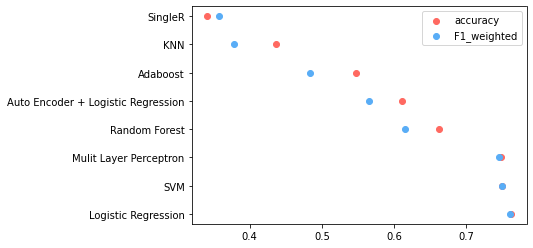

In [9]:
fig,ax=plt.subplots()
ax1=plt.subplot(111)
ax1=plt.scatter(x=acc,y=y.columns[2:],color=['#ff6961'],label='accuracy')
# ax1=plt.scatter(x=y.columns[2:],y=f1,color=['#42d6a4'],label='F1_average',alpha=0.5)
ax1=plt.scatter(x=f1weighted,y=y.columns[2:],color=['#59adf6'],label='F1_weighted')
ax1.set_xlim=[0.3,1]
ax1.set_xlabel=('Accuracy Score')
plt.legend()
# plt.xticks(rotation=90)

fig.savefig('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/acc.png',dpi=400,bbox_inches = "tight")

In [11]:
#computation time vs accuracy
#time_acc=pd.DataFrame(columns=['model','acc','time'])
time=[5800,129660,931,1545,0,4558,91.8,82440]
time_acc = pd.DataFrame({'accuracy':acc,'time':time,'model':y.columns[2:]})
time_acc = time_acc[time_acc['time']!=0]

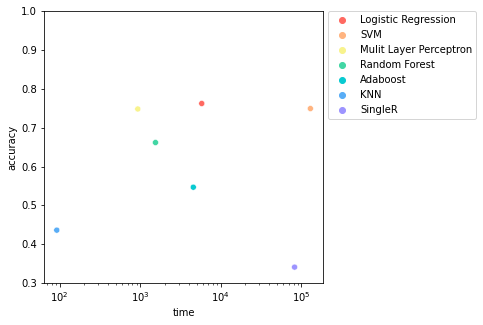

In [12]:
figs2,axs2=plt.subplots(figsize=(5,5))
ax2=plt.subplot(111)
t_a = sns.scatterplot(data=time_acc,x='time',y='accuracy',hue='model',palette=['#ff6961','#ffb480','#f8f38d','#42d6a4','#08cad1','#59adf6','#9d94ff'],ax=ax2)
plt.legend()
ax1.set_xlabel=('Time/s')
ax2.set(ylim=(0.3,1),xscale="log")
ax2.legend(bbox_to_anchor=(1, 1.02))
figs2.savefig('/hpf/largeprojects/tabori/users/yuan/mbp1413/output/Figs/time.png',dpi=400,bbox_inches = "tight")
